In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

Proses ini merupakan eksplorasi awal untuk memahami struktur, kualitas, dan pola dalam data. Ini mencakup identifikasi missing values, outlier, distribusi variabel


In [2]:
#melakukan load pada datset
url = 'loan_data_2007_2014 (2).csv'
df = pd.read_csv('loan_data_2007_2014 (2).csv')
df.head()

C:\Users\H P\AppData\Local\Temp\ipykernel_25500\3129938849.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014 (2).csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#membuat salinan data untuk dimanipulasi tanpa mengubah data aslinyaaa
df_copy = df.copy()

In [4]:
df_copy.dtypes

Unnamed: 0            int64
id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 75, dtype: object

In [4]:
#statistika deskriptif
df_copy.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


# Data Cleaning

Ini merupakan proses dimana kita mengubah data yang awalnya mentah menjadi data ng siap untuk diestimasi

In [5]:
#melihat jumlah missing value pada datasets
missing_data = df_copy.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")
    

Unnamed: 0
Unnamed: 0
False    466285
Name: count, dtype: int64

id
id
False    466285
Name: count, dtype: int64

member_id
member_id
False    466285
Name: count, dtype: int64

loan_amnt
loan_amnt
False    466285
Name: count, dtype: int64

funded_amnt
funded_amnt
False    466285
Name: count, dtype: int64

funded_amnt_inv
funded_amnt_inv
False    466285
Name: count, dtype: int64

term
term
False    466285
Name: count, dtype: int64

int_rate
int_rate
False    466285
Name: count, dtype: int64

installment
installment
False    466285
Name: count, dtype: int64

grade
grade
False    466285
Name: count, dtype: int64

sub_grade
sub_grade
False    466285
Name: count, dtype: int64

emp_title
emp_title
False    438697
True      27588
Name: count, dtype: int64

emp_length
emp_length
False    445277
True      21008
Name: count, dtype: int64

home_ownership
home_ownership
False    466285
Name: count, dtype: int64

annual_inc
annual_inc
False    466281
True          4
Name: count, dtype: int64

verif

In [7]:
df_copy.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [6]:
#data yang memiliki missing value lebih dari 40 persen akan terhapus
threshold = 0.4
df_clean = df_copy.dropna( axis = 1, thresh=(len(df_copy)*(1-threshold)))

#sebelum dan sesudah di drop
print(df_copy.shape)
print(df_clean.shape)

(466285, 75)
(466285, 53)


In [7]:
df_clean.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

In [8]:
#Melihat data yang hilang setelah di threshold
missing_data = pd.DataFrame({
    'Data Type': df_clean.dtypes,
    'Missing Value': df_clean.isnull().sum(),
    'Percentage missing': df_clean.isnull().sum() / df_clean.shape[0] * 100 })
print(missing_data)

                           Data Type  Missing Value  Percentage missing
Unnamed: 0                     int64              0            0.000000
id                             int64              0            0.000000
member_id                      int64              0            0.000000
loan_amnt                      int64              0            0.000000
funded_amnt                    int64              0            0.000000
funded_amnt_inv              float64              0            0.000000
term                          object              0            0.000000
int_rate                     float64              0            0.000000
installment                  float64              0            0.000000
grade                         object              0            0.000000
sub_grade                     object              0            0.000000
emp_title                     object          27588            5.916553
emp_length                    object          21008            4

In [9]:
#mencari nilai duplikat 
df_clean.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
466280    False
466281    False
466282    False
466283    False
466284    False
Length: 466285, dtype: bool

In [10]:
#Impiutasi missing value
numeric_value = df_clean.select_dtypes(include = ['float64','int64']).columns
categoric_value = df_clean.select_dtypes(include = ['object']).columns

#numeric value
for col in numeric_value : 
    if df_clean[col].isnull().sum() > 0:
        median = df_clean[col].median()
        df_clean[col].fillna(median,inplace = True)

#categoric
for col in categoric_value : 
    if df_clean[col].isnull().sum() > 0:
        mode = df_clean[col].mode()[0]
        df_clean[col].fillna(mode, inplace = True)
    
    

C:\Users\H P\AppData\Local\Temp\ipykernel_25500\4130455756.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median,inplace = True)
C:\Users\H P\AppData\Local\Temp\ipykernel_25500\4130455756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col].fillna(median,inplace = True)
C:\Users\H P\AppData\Local\Temp\ipy

In [13]:
#mengecek kembali datanya
df_clean.isnull().sum()

Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

In [14]:
#mendefinisikan variabel dependennya 
df_clean.loan_status.value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [11]:
goodstat_loan = ['Current','Fully Paid','Does not meet the credit policy. Status:Fully Paid']
badstat_loan = ['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default','Does not meet the credit policy. Status:Charged Off']

df_clean['loan_stat_category'] = df_clean['loan_status'].apply(lambda x: 'good loan' if x in goodstat_loan else 'bad loan' )

C:\Users\H P\AppData\Local\Temp\ipykernel_25500\1546026101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['loan_stat_category'] = df_clean['loan_status'].apply(lambda x: 'good loan' if x in goodstat_loan else 'bad loan' )


In [12]:
df_clean.loan_stat_category.value_counts()

loan_stat_category
good loan    410953
bad loan      55332
Name: count, dtype: int64

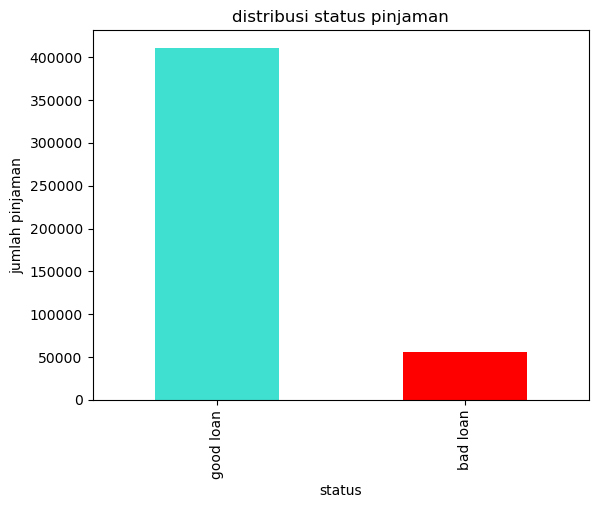

In [13]:
#bar plot untuk melihat distribusi
df_clean['loan_stat_category'].value_counts().plot(kind='bar', color=['#40E0D0','red'])
plt.title('distribusi status pinjaman')
plt.xlabel('status')
plt.ylabel('jumlah pinjaman')
plt.show()
          

berdasarkan value count dan juga distribusi melalui bar chart ditemukan bahwa jumlah status pinjaman 'good loan' memiliki nilai sebesar 410953 sementara untuk yang bad loan sebesar55332

In [14]:
df_clean.columns
for column in df_clean.columns:
    value = df_clean[column].value_counts()
    print('Value Count',column,'sebesar',value)
    print ('')

Value Count Unnamed: 0 sebesar Unnamed: 0
0         1
310839    1
310865    1
310864    1
310863    1
         ..
155424    1
155423    1
155422    1
155421    1
466284    1
Name: count, Length: 466285, dtype: int64

Value Count id sebesar id
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: count, Length: 466285, dtype: int64

Value Count member_id sebesar member_id
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: count, Length: 466285, dtype: int64

Value Count loan_amnt sebesar loan_amnt
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: count, Length: 1352, dtype: int64

Value Count funded_amnt sebesar funded_amnt
10000    32930
12000    25426
150

In [15]:
drop_column = ['Unnamed: 0','id','member_id','emp_title', 'loan_status', 'zip_code','title','funded_amnt','funded_amnt_inv','issue_d',
    'pymnt_plan','url','earliest_cr_line','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
    'total_rec_int','total_rec_late_fee',
    'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
    'last_credit_pull_d','policy_code']

df_clean.drop(columns=drop_column, axis=1, inplace=True)

C:\Users\H P\AppData\Local\Temp\ipykernel_25500\2214648655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=drop_column, axis=1, inplace=True)


In [16]:
df_clean.head()
df_clean.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_stat_category'],
      dtype='object')

In [17]:
df_clean.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util                    float64
total_acc                     float64
initial_list_status            object
collections_12_mths_ex_med    float64
application_type               object
acc_now_delinq                float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_rev_hi

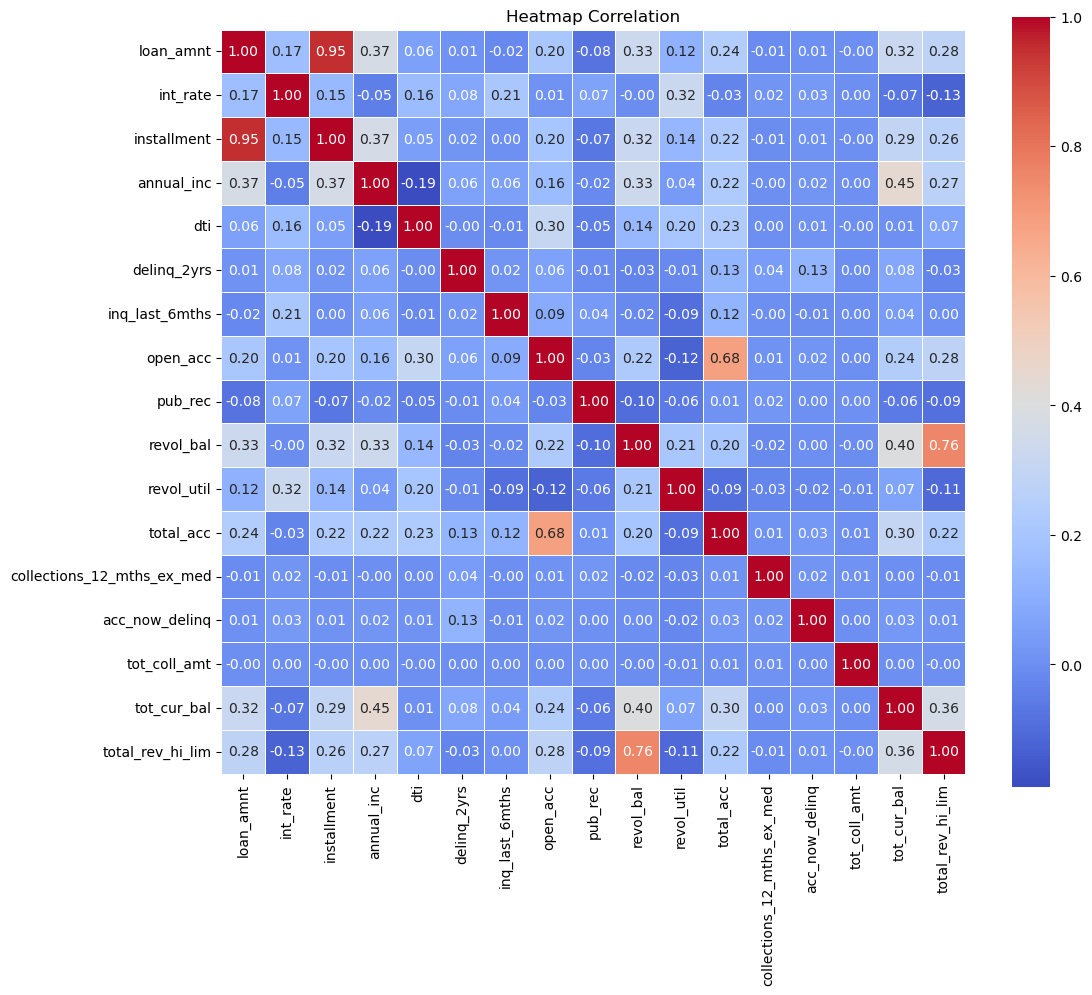

In [18]:
#mengecek multikolinearitas / korelasi

#numeric value
numerical_value = df_clean.select_dtypes(include=['int64', 'float64'])


corelation_matrix = numerical_value.corr()

#heatmap
plt.figure(figsize =(12,10))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Heatmap Correlation')
plt.show()

In [19]:
df_clean.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status',
       'application_type', 'loan_stat_category'],
      dtype='object')

In [20]:
drop_column2 = ['installment','total_acc','total_rev_hi_lim','addr_state','sub_grade','dti']
df_clean.drop(columns=drop_column2, axis=1, inplace=True)

C:\Users\H P\AppData\Local\Temp\ipykernel_25500\2307644605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=drop_column2, axis=1, inplace=True)


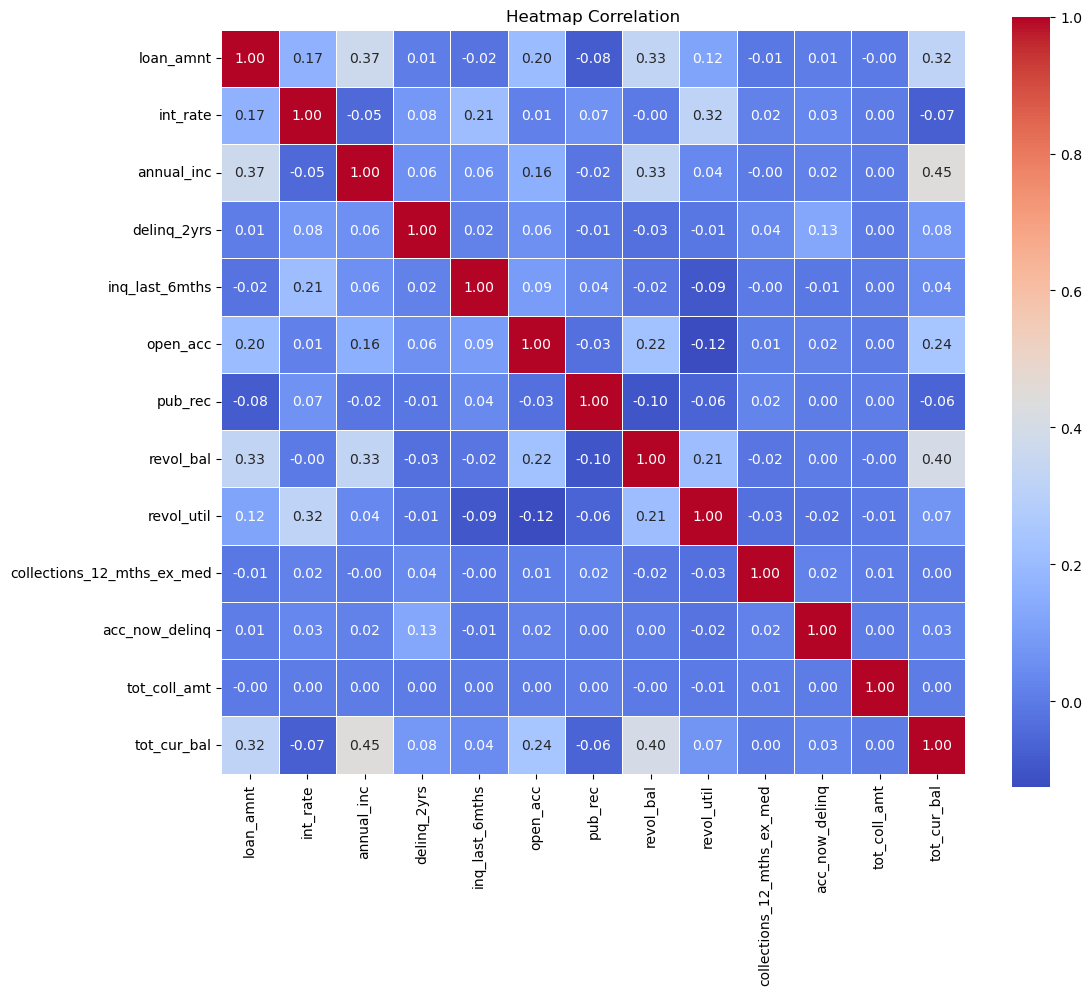

In [21]:
#heatmap setelah di drop ke 2 kali
numerical_value = df_clean.select_dtypes(include=['int64', 'float64'])


corelation_matrix = numerical_value.corr()

#heatmap
plt.figure(figsize =(12,10))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Heatmap Correlation')
plt.show()

In [22]:
df_clean.dtypes

loan_amnt                       int64
term                           object
int_rate                      float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
purpose                        object
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util                    float64
initial_list_status            object
collections_12_mths_ex_med    float64
application_type               object
acc_now_delinq                float64
tot_coll_amt                  float64
tot_cur_bal                   float64
loan_stat_category             object
dtype: object

In [23]:
#merubah data y

# 1. TERM (ubah menjadi numerik)
df_clean['term'] = df_clean['term'].str.extract('(\d+)').astype(float)

# 2. megubah nilai grade (A-G -> 1-7)
grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df_clean['grade'] = df_clean['grade'].map(grade_map)

#(mapping tahun kerja)
emp_length_map = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5
}
df_clean['emp_length'] = df_clean['emp_length'].replace(emp_length_map).astype(float)

# 4. label encoding untuk kolom dengan 2 kategori
label_cols = ['initial_list_status', 'application_type', 'loan_stat_category']
for col in label_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

# 5. one hot encoding untuk kolom kategorikal nominal
df_clean = pd.get_dummies(df_clean, columns=['home_ownership', 'verification_status', 'purpose'], drop_first=True,dtype=int)


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\H P\AppData\Local\Temp\ipykernel_25500\3788645273.py:4: SyntaxWarning: invalid escape sequence '\d'
  df_clean['term'] = df_clean['term'].str.extract('(\d+)').astype(float)
C:\Users\H P\AppData\Local\Temp\ipykernel_25500\3788645273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['term'] = df_clean['term'].str.extract('(\d+)').astype(float)
C:\Users\H P\AppData\Local\Temp\ipykernel_25500\3788645273.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [24]:
df_clean.describe()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000
mean,14317.277577,42.605334,13.829236,2.817095,6.212734,7.327729e+04,0.284661,0.804695,11.186995,0.160554,...,0.056912,0.004866,0.021077,0.009870,0.006421,0.050806,0.000753,0.015040,0.005334,0.005025
std,8286.509164,10.719040,4.357587,1.320385,3.576477,5.496334e+04,0.797343,1.091583,4.987380,0.510848,...,0.231674,0.069588,0.143642,0.098854,0.079873,0.219601,0.027426,0.121713,0.072837,0.070708
min,500.000000,36.000000,5.420000,1.000000,0.500000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.990000,2.000000,3.000000,4.500000e+04,0.000000,0.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.660000,3.000000,7.000000,6.300000e+04,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,60.000000,16.490000,4.000000,10.000000,8.895300e+04,0.000000,1.000000,14.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35000.000000,60.000000,26.060000,7.000000,10.000000,7.500000e+06,29.000000,33.000000,84.000000,63.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 39 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            466285 non-null  int64  
 1   term                                 466285 non-null  float64
 2   int_rate                             466285 non-null  float64
 3   grade                                466285 non-null  int64  
 4   emp_length                           466285 non-null  float64
 5   annual_inc                           466285 non-null  float64
 6   delinq_2yrs                          466285 non-null  float64
 7   inq_last_6mths                       466285 non-null  float64
 8   open_acc                             466285 non-null  float64
 9   pub_rec                              466285 non-null  float64
 10  revol_bal                            466285 non-null  int64  
 11  revol_util   

# Modelling 

Dalam modelling ini menggunakan 3 jenis model machine learning yaitu : Logistic Regression, Decision Tree dan Random Forest

In [29]:
# mendefinisikan variabel dependen dan independen
X = df_clean.drop('loan_stat_category', axis=1)
y = df_clean['loan_stat_category']

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)
ypred_logreg = logreg.predict(X_test)
print("=== Logistic Regression ===")
print("Akurasi:", accuracy_score(y_test, ypred_logreg))
print(confusion_matrix(y_test, ypred_logreg))
print(classification_report(y_test, ypred_logreg))

# 2. Decision Tree
dectree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dectree.fit(X_train, y_train)
ypred_tree = dectree.predict(X_test)
print("=== Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, ypred_tree))
print(confusion_matrix(y_test, ypred_tree))
print(classification_report(y_test, ypred_tree))

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_test)
print("=== Random Forest ===")
print("Akurasi:", accuracy_score(y_test, ypred_rf))
print(confusion_matrix(y_test, ypred_rf))
print(classification_report(y_test, ypred_rf))

C:\Users\H P\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
Akurasi: 0.584578101375768
[[ 7260  3820]
 [34921 47256]]
              precision    recall  f1-score   support

           0       0.17      0.66      0.27     11080
           1       0.93      0.58      0.71     82177

    accuracy                           0.58     93257
   macro avg       0.55      0.62      0.49     93257
weighted avg       0.84      0.58      0.66     93257

=== Decision Tree ===
Akurasi: 0.7986639072670149
[[ 1767  9313]
 [ 9463 72714]]
              precision    recall  f1-score   support

           0       0.16      0.16      0.16     11080
           1       0.89      0.88      0.89     82177

    accuracy                           0.80     93257
   macro avg       0.52      0.52      0.52     93257
weighted avg       0.80      0.80      0.80     93257

=== Random Forest ===
Akurasi: 0.8811456512647844
[[   23 11057]
 [   27 82150]]
              precision    recall  f1-score   support

           0       0.46      0.00      0.00

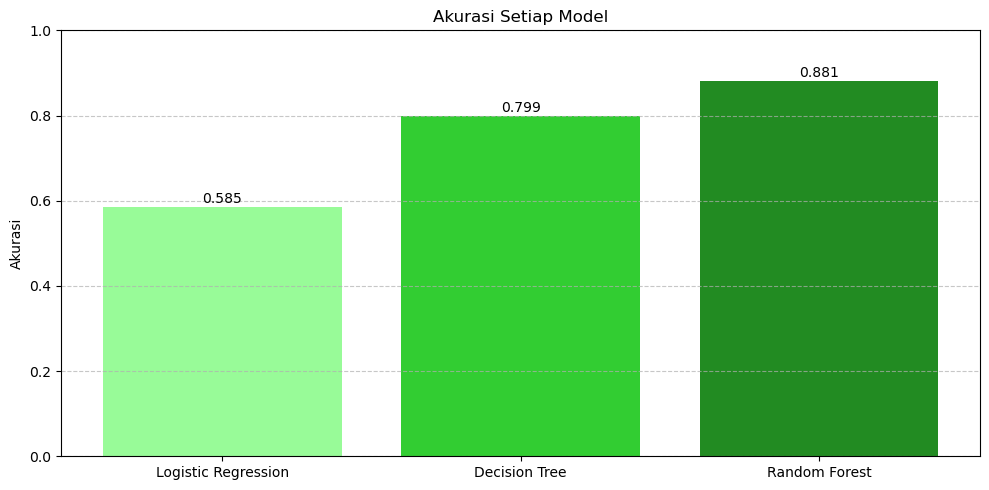

In [34]:
# membuat perbandingan akurasi setiap model

acc_logreg = accuracy_score(y_test, ypred_logreg)
acc_dectree = accuracy_score(y_test, ypred_tree)
acc_rf = accuracy_score(y_test, ypred_rf)

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [acc_logreg, acc_dectree, acc_rf]

# Buat bar plot
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['palegreen', 'limegreen', 'forestgreen'])
plt.title('Akurasi Setiap Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai akurasi di atas bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()